In [1]:
from google.colab import files
uploaded = files.upload()

Saving international-airline-passengers.csv to international-airline-passengers.csv


In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


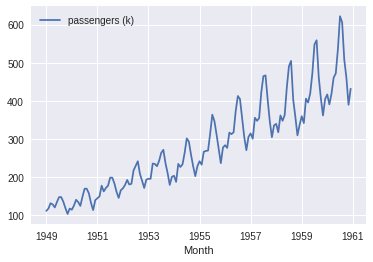

In [3]:
dataframe = pd.read_csv('international-airline-passengers.csv', \
                        index_col=0, engine='python', skipfooter=3)
dataframe.columns = ['passengers (k)']
dataframe.index = pd.to_datetime(dataframe.index)
dataframe.plot()

In [4]:
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# 入力データの正規化
from sklearn.preprocessing import MinMaxScaler

# [0,1]に正規化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [6]:
# 訓練データとテストデータを分割
#（時系列の予測が目的のため、ある時点から先をテストデータとする）
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
# X=[data[t-look_back],...,data[t-1]], Y=data[t]となるデータセットに変換
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# [samples, time steps, features]へ変形
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN

hid_dim = 10

# LSTMにDenseを接続し、数値を予測（MSEで評価）
model = Sequential()

# input_shape=(系列長T, x_tの次元), output_shape=(系列長T, units(=hid_dim))
model.add(SimpleRNN(hid_dim, input_shape=(look_back, 1))) 
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

Using TensorFlow backend.


NameError: ignored

In [9]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 2s - loss: 0.0198
Epoch 2/100
 - 1s - loss: 0.0122
Epoch 3/100
 - 1s - loss: 0.0105
Epoch 4/100
 - 1s - loss: 0.0094
Epoch 5/100
 - 1s - loss: 0.0084
Epoch 6/100
 - 1s - loss: 0.0077
Epoch 7/100
 - 1s - loss: 0.0072
Epoch 8/100
 - 1s - loss: 0.0064
Epoch 9/100
 - 1s - loss: 0.0061
Epoch 10/100
 - 1s - loss: 0.0058
Epoch 11/100
 - 1s - loss: 0.0051
Epoch 12/100
 - 1s - loss: 0.0047
Epoch 13/100
 - 1s - loss: 0.0045
Epoch 14/100
 - 1s - loss: 0.0043
Epoch 15/100
 - 1s - loss: 0.0044
Epoch 16/100
 - 1s - loss: 0.0040
Epoch 17/100
 - 1s - loss: 0.0036
Epoch 18/100
 - 1s - loss: 0.0038
Epoch 19/100
 - 1s - loss: 0.0035
Epoch 20/100
 - 1s - loss: 0.0034
Epoch 21/100
 - 1s - loss: 0.0033
Epoch 22/100
 - 1s - loss: 0.0031
Epoch 23/100
 - 1s - loss: 0.0027
Epoch 24/100
 - 1s - loss: 0.0034
Epoch 25/100
 - 1s - loss: 0.0028
Epoch 26/100
 - 1s - loss: 0.0030
Epoch 27/100
 - 1s - loss: 0.0029
Epoch 28/100
 - 1s - loss: 0.0026
Epoch 29/100
 - 1s - loss: 0.0026
Epoch 30/100
 - 1s - lo

Epoch 55/100
 - 1s - loss: 0.0020
Epoch 56/100
 - 1s - loss: 0.0020
Epoch 57/100
 - 1s - loss: 0.0020
Epoch 58/100
 - 1s - loss: 0.0020
Epoch 59/100
 - 1s - loss: 0.0019
Epoch 60/100
 - 1s - loss: 0.0019
Epoch 61/100
 - 1s - loss: 0.0020
Epoch 62/100
 - 1s - loss: 0.0019
Epoch 63/100
 - 1s - loss: 0.0018
Epoch 64/100
 - 1s - loss: 0.0019
Epoch 65/100
 - 1s - loss: 0.0018
Epoch 66/100
 - 1s - loss: 0.0019
Epoch 67/100
 - 1s - loss: 0.0018
Epoch 68/100
 - 1s - loss: 0.0018
Epoch 69/100
 - 1s - loss: 0.0018
Epoch 70/100
 - 1s - loss: 0.0017
Epoch 71/100
 - 1s - loss: 0.0019
Epoch 72/100
 - 1s - loss: 0.0018
Epoch 73/100
 - 1s - loss: 0.0018
Epoch 74/100
 - 1s - loss: 0.0019
Epoch 75/100
 - 1s - loss: 0.0020
Epoch 76/100
 - 1s - loss: 0.0018
Epoch 77/100
 - 1s - loss: 0.0018
Epoch 78/100
 - 1s - loss: 0.0018
Epoch 79/100
 - 1s - loss: 0.0018
Epoch 80/100
 - 1s - loss: 0.0018
Epoch 81/100
 - 1s - loss: 0.0018
Epoch 82/100
 - 1s - loss: 0.0019
Epoch 83/100
 - 1s - loss: 0.0018
Epoch 84/100
 

In [10]:
import math
from sklearn.metrics import mean_squared_error

# テストデータに対する予測（評価のため訓練データも）
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 正規化を元に戻す（人数の単位で誤差を表示）
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 平均二乗誤差のルートで評価
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 21.21
Test RMSE: 44.57


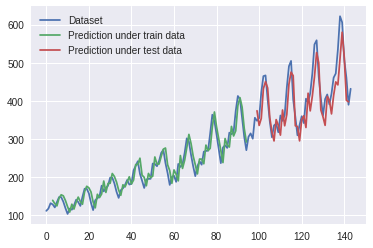

In [11]:
# 訓練データ部分の予測データ
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# テストデータ部分の予測データ
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Prediction under train data')
plt.plot(testPredictPlot, label='Prediction under test data')
plt.legend()
plt.show()